In [1]:
### PYCHARM ###

import fastai
import torch
from fastai.vision.all import *
from fastai.callback.fp16 import *


from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch


path = "dataset_CIFAR10"


In [2]:
### COLAB ###
"""
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.callback.fp16 import *

!unzip /content/gdrive/MyDrive/dataset_CIFAR10.zip
path = "/content/"
"""

'\n! [ -e /content ] && pip install -Uqq fastbook\nimport fastbook\nfrom fastbook import *\nfastbook.setup_book()\nfrom fastai.callback.fp16 import *\n\n!unzip /content/gdrive/MyDrive/dataset_CIFAR10.zip\npath = "/content/"\n'

In [3]:
#check if cuda is available
torch.cuda.is_available()

True

In [4]:
dls = ImageDataLoaders.from_folder(
    path=path,
    train='train',
    valid='validation',
    seed=42,
    bs = 512
)

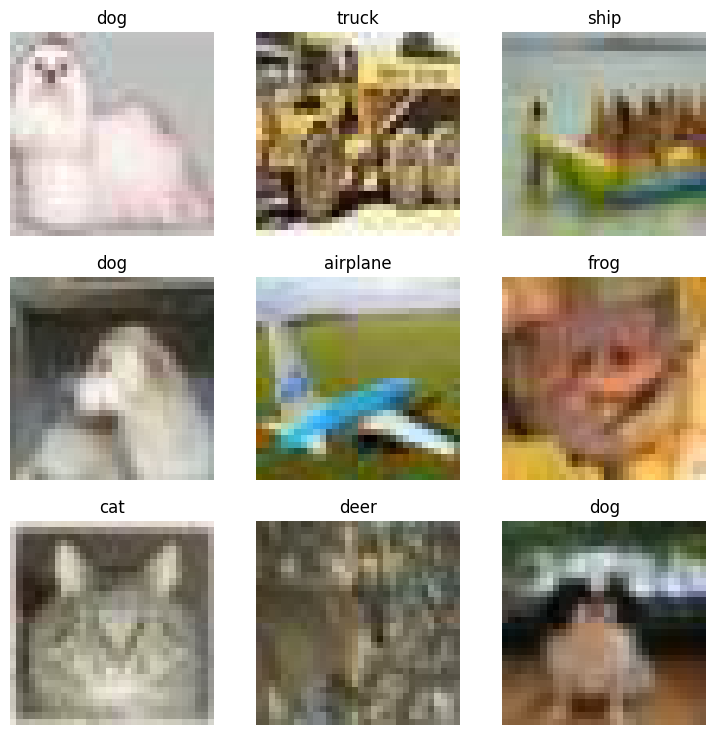

In [5]:
dls.show_batch()

En aquest apartat compararem el resultat de diferents xarxes resnets (18, 50, 152) sense aplicar cap transformació a les imatges, per aconseguir la puntuació baseline.  

#### RESNET18

In [6]:
learn18 = vision_learner(dls, resnet18, metrics=[accuracy, error_rate]).to_fp16()
learn18.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.385343,1.222587,0.574200,0.425800,00:40
1,1.117992,1.010898,0.648200,0.351800,00:40
2,0.861507,0.938723,0.681000,0.319000,00:40
3,0.649239,0.950531,0.690600,0.309400,00:40
4,0.481811,0.982267,0.696000,0.304000,00:40
5,0.393235,0.987876,0.695600,0.304400,00:40


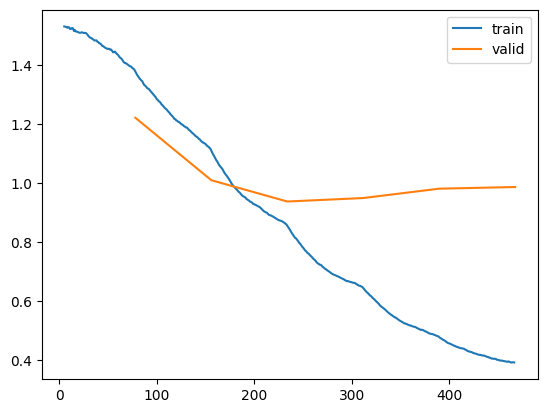

In [7]:
#plot loss and accuracy
learn18.recorder.plot_loss()

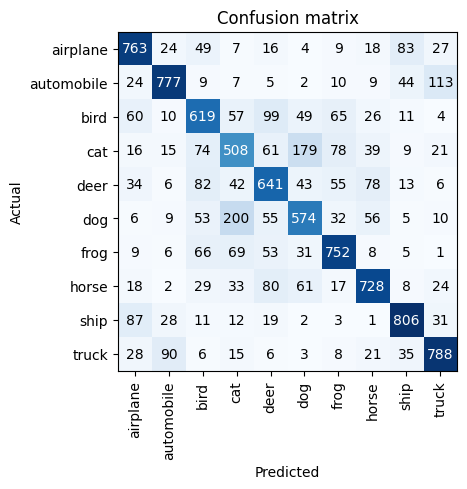

In [9]:
#plot confusion matrix
interp18 = ClassificationInterpretation.from_learner(learn18)
interp18.plot_confusion_matrix()

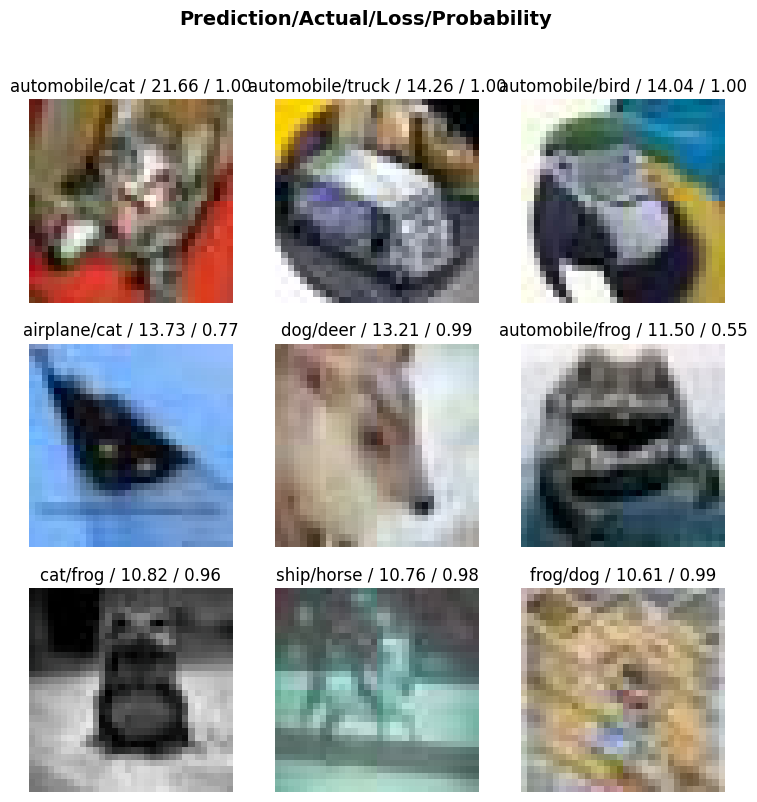

In [10]:
#plot top losses
interp18.plot_top_losses(9, nrows=3)

#### RESNET50

In [11]:
learn50 = vision_learner(dls, resnet50, metrics=[accuracy, error_rate]).to_fp16()
learn50.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.169409,1.033415,0.639900,0.360100,00:43
1,0.921372,0.908446,0.693600,0.306400,00:43
2,0.604859,0.900854,0.714400,0.285600,00:43
3,0.305842,1.118540,0.716900,0.283100,00:43
4,0.128853,1.214882,0.716000,0.284000,00:43
5,0.056601,1.232649,0.719400,0.280600,00:43


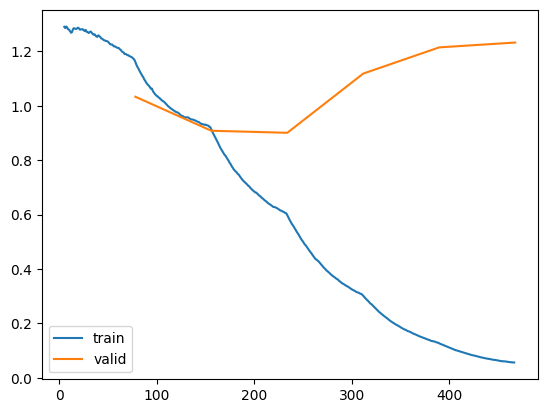

In [12]:
learn50.recorder.plot_loss()

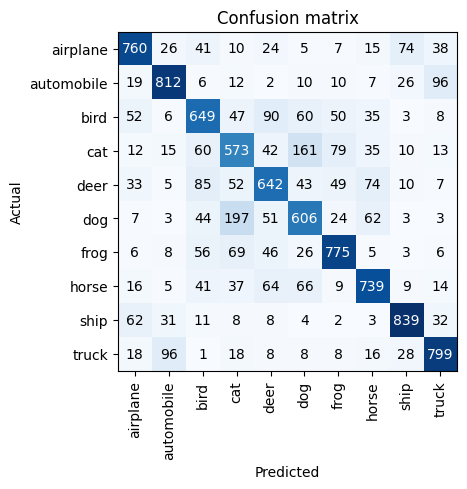

In [13]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp50.plot_confusion_matrix()

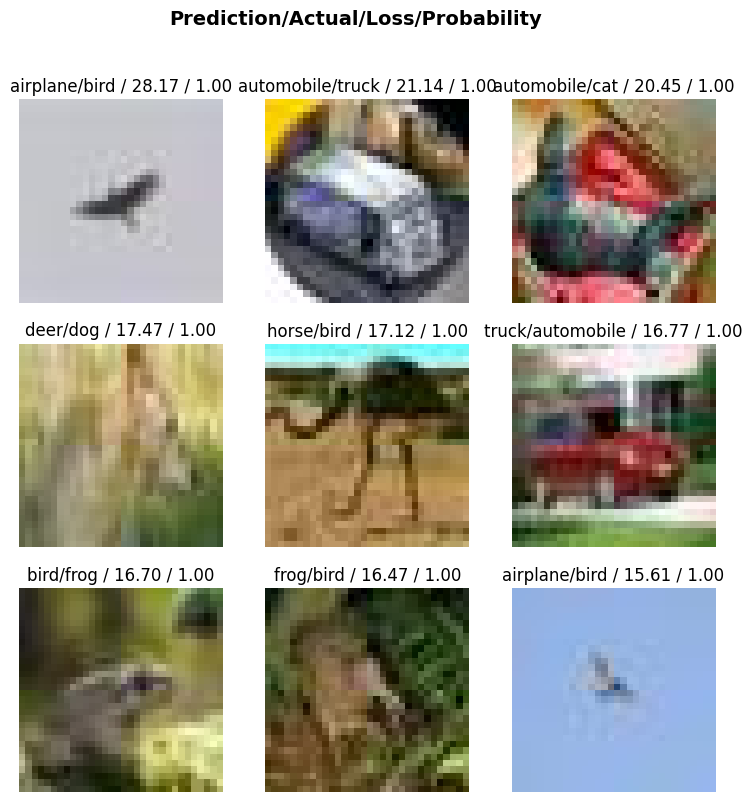

In [14]:
interp50.plot_top_losses(9, nrows=3)

#### RESNET152

In [15]:
learn152 = vision_learner(dls, resnet152, metrics=[accuracy, error_rate]).to_fp16()
learn152.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.099790,1.020134,0.654300,0.345700,00:50
1,0.803024,0.882483,0.715700,0.284300,00:50
2,0.493129,0.896221,0.725300,0.274700,00:49
3,0.221920,1.026271,0.736400,0.263600,00:49
4,0.075423,1.078702,0.740600,0.259400,00:49
5,0.028731,1.094062,0.738900,0.261100,00:49


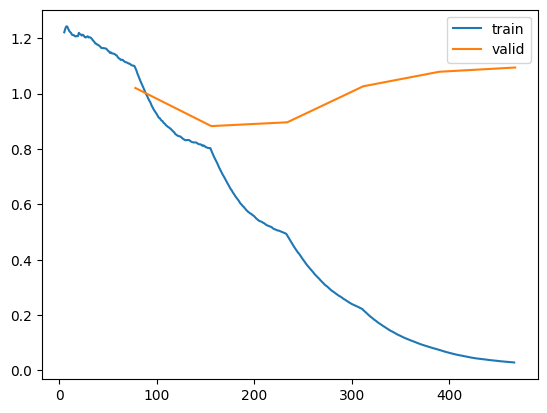

In [16]:
learn152.recorder.plot_loss()

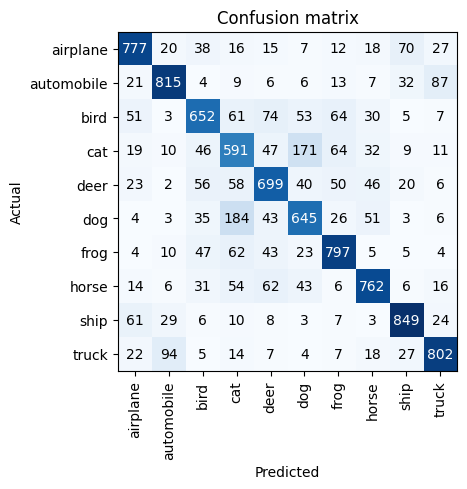

In [18]:
inter152 = ClassificationInterpretation.from_learner(learn152)
inter152.plot_confusion_matrix()

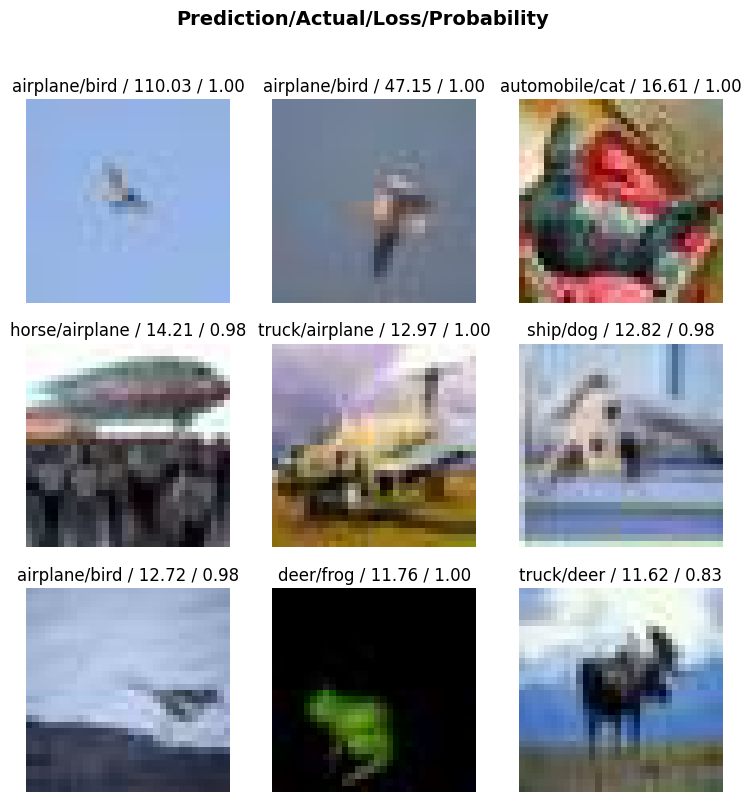

In [ ]:
inter152.plot_top_losses(9, nrows=3)

#### Anàlisi de resultats

Podem veure que sense aplicar cap transformació a les imatges, amb 3 èpoques de congelació i 6 d'entrenament tenim:
- RESNET 18: 70% d'accuracy
- RESNET 50: 72% d'accuracy
- RESNET 152: 74% d'accuracy

Veiem que tots els models tenen un comportament molt similar, ja que en cap cas estem cometent overfitting, les mètriques són molt semblants i en tots els casos els elements que confón més són els gats i els gossos (i viceversa), i els camions amb els automòbils (i viceversa).


Podem veure també com a mesura que anem posant més capes, el temps per epoch és major (en resnet18 tarda 40 segons, 44 en resnet50 i 50 en resnet152).
